In [1]:
# import all libraries and dependencies for dataframe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Understanding the Data

In [2]:
# Reading the data file
df = pd.read_csv('test_data.csv')

In [3]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
df.dtypes

x      int64
y    float64
dtype: object

In [5]:
df.isna().sum()

x    0
y    0
dtype: int64

### Data Visualization

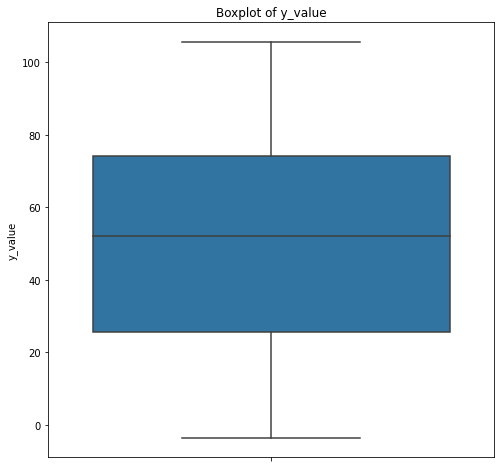

In [6]:
plt.figure(figsize = (8, 8))
plot = sns.boxplot(y = 'y', data = df)
plot.title.set_text('Boxplot of y_value')
plt.ylabel('y_value')
plt.show()

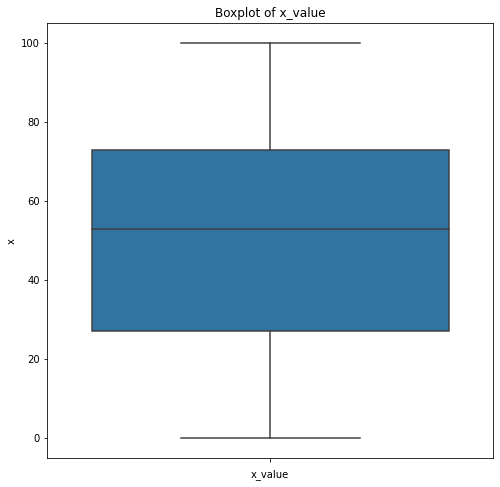

In [7]:
plt.figure(figsize = (8, 8))
plot = sns.boxplot(y = 'x', data = df)
plot.title.set_text('Boxplot of x_value') #plt.title('Scatterplot of x and y')
plt.xlabel('x_value')
plt.show()

* The columns of the dataset don't have any outlier. 

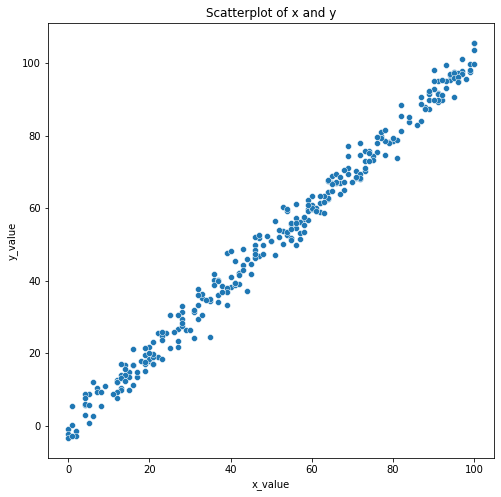

In [8]:
plt.figure(figsize = (8, 8))
plot = sns.scatterplot(x = 'x', y = 'y', data = df)
plot.title.set_text('Scatterplot of x and y') 
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.show()

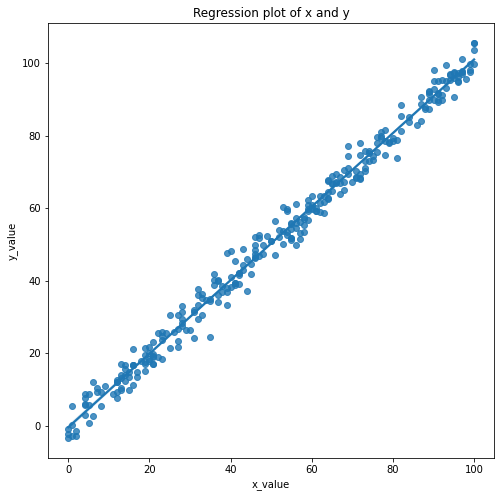

In [9]:
plt.figure(figsize = (8, 8))
sns.regplot(x = 'x', y = 'y', data = df)
plt.title('Regression plot of x and y')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.show()

In [10]:
df['x'].corr(df['y'])

0.9945453037143513

### Equation of Line to predict the y_value

1. Method First

In [11]:
import statsmodels.api as sn
X = sn.add_constant(df['x'])

In [12]:
lm =sn.OLS(df['y'], X).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          1.33e-294
Time:                        03:18:05   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Regression Eqution

$y = -0.4618 + 1.0143*x$

2. Method Second

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
y = df['y']

In [16]:
X = df[['x']]

In [17]:
lm2 = LinearRegression()

In [18]:
lm2.fit(X, y)

LinearRegression()

In [19]:
print(lm2.intercept_, lm2.coef_)

-0.4618107736611776 [1.01433536]


### The Regression Eqution

$y = -0.46181077 + 1.01433536*x$

#### Dividing test set into X_test and y_test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(240, 1) (60, 1) (240,) (60,)


In [23]:
lm_a = LinearRegression()

In [24]:
lm_a.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_test_a = lm_a.predict(X_test)

In [26]:
Y_train_a = lm_a.predict(X_train)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(Y_test, Y_test_a)

0.9889794732637583

In [29]:
r2_score(Y_train, Y_train_a)

0.989139123833634

##### The R2 score of Training set is 0.989 and Test set is 0.989 which is quite close. Hence, We can say that our model is good enough to predict the y_value using x_value.